<a href="https://colab.research.google.com/github/CasCard/Machine-Learning-Project/blob/master/ANNMNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time as t

In [24]:
print(tf.__version__)

2.1.0


In [25]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


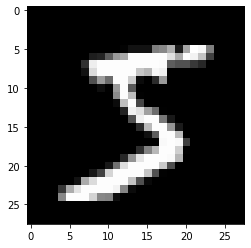

In [26]:
plt.imshow(x_train[0],cmap="gray")
plt.show()

In [0]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10,activation="softmax")
])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
import time as t
A1=t.time()
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
A2=t.time()
print(A2-A1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2969 - accuracy: 0.9136 - val_loss: 0.1398 - val_accuracy: 0.9576
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1434 - accuracy: 0.9569 - val_loss: 0.0967 - val_accuracy: 0.9698
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1075 - accuracy: 0.9677 - val_loss: 0.0885 - val_accuracy: 0.9713
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0737 - val_accuracy: 0.9768
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0736 - accuracy: 0.9769 - val_loss: 0.0737 - val_accuracy: 0.9786
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0660 - accuracy: 0.9791 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 7/10
60000/60000 [==============================] 

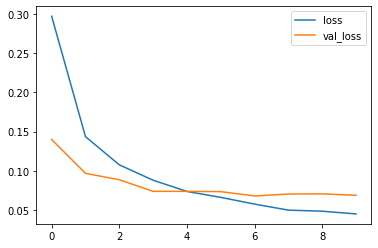

In [30]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

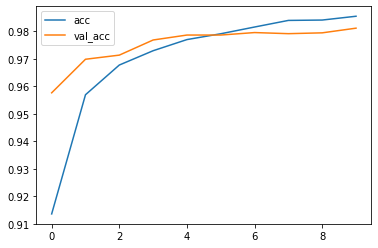

In [31]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [32]:
A3=t.time()
print(model.evaluate(x_test,y_test))
A4=t.time()
print(A4-A3)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.0687 - accuracy: 0.9811
[0.06871603070718701, 0.9811]
0.5847306251525879


In [33]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9


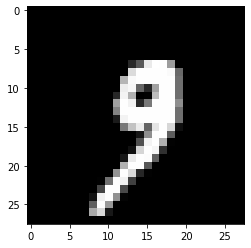

In [34]:
plt.imshow(x_test[1000],cmap="gray")
plt.show()